# **Projeto de Estatística II - LM Data Talents (ADA & Leroy Merlin)**

## **Grupo 2:** 
- Abelar Henrique Dias Vaz
- Christyan Costa de Oliveira
- Cristiane Del Barco Nunes
- Danilo Nozima
- Luis Ernesto Beingolea

# **Introdução** 

<font color = red>

- Descrever a base de dados:
Os dados são tomados do centro clínico da universidade de Wisconsin sobre diagnóstico de câncer de mama. As características foram calculadas de uma imagem digitalizada de uma amostra retirada de material citológico para análise patológica por punção aspirativa por agulha fina (PAAF) de um nódulo de mama. Descrevem características do núcleo celular presentes na imagem no microscópio.
Os autores da pesquisa são W.N. Street, W.H. Wolberg and O.L. Mangasarian, a qual foi publicada com o nome: "***Nuclear feature extraction for breast tumor diagnosis***" em 1993 no IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

Informação de atributos:¶

    id
    diagnosis: diagnóstico tumoral (M = maligno, B = benigno)

Columnas 3 a 32

Dez características con valores reais foram calculadas para cada núcleo celular:

    radius: distâncias desde o centro até os pontos sobre o perímetro
    texture: desvios padrão de valores nas escalas de cinza
    perimeter: perímetro celular
    area: área celular
    smoothness: variação local nos comprimentos do rádio
    compactness: perímetro^2 / area - 1.0
    concavity: severidade de porções côncavas do contorno
    concave points: número de porções côncavas portions do contorno
    symmetry: simetria
    fractal dimension: "aproximação da linha de costa" - 1

As médias, erro padrão, e a "pior" ou a maior (média dos maiores três valores) das características foram calculadas para cada, resultando em 30 features. Assim, o campo 3 do CSV é o Raio Médio, campo 13 é EP Raio, campo 23 é o Pior Raio.

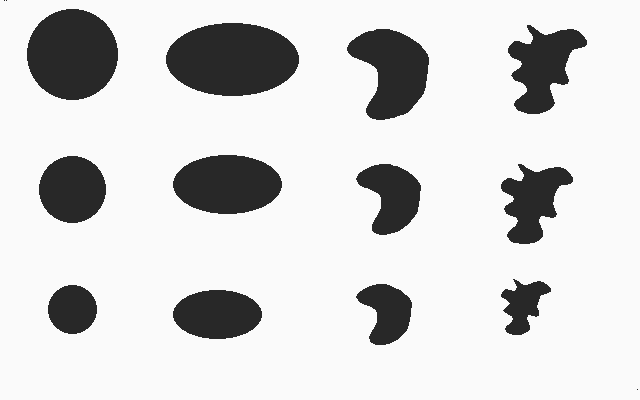


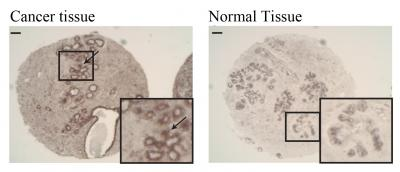

- Formular o problema que trataremos:
O objetivo é construir um modelo de regressão que permita com as features determinar se uma amostra celular vem de um tumor maligno

In [87]:
# Exploração dos dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
            confusion_matrix, classification_report, roc_curve, roc_auc_score,\
            mean_squared_error, r2_score

## Carregando os dados  

In [2]:
df = pd.read_csv("breast_cancer_wisconsin_dataset.csv", index_col=0)
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  ...  texture_worst  \
id                                            ...                  
842302                0.14710         0.2419  ...          17.33   
842517                0.07017         0.1812  ...          23.41   
84300903              0.12790         0.2069  ...          25.53   
84348301              0.10520         0.2597  ...          26.50   
84358402              0.10430         0.1809  ...          16.67   

          perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                           
842302             184.60      2019.0            0.1622             0.6656   
842517             158.80      1956.0            0.1238             0.1866   
84300903           152.50      1709.0            0.1444             0.4245   
84348301            98.87       567.7            0.2098             0.8663   
84358402           152.20      1575.0            0.1374             0.2050   

          concavity_worst  concave points_worst  symmetry_worst  \
id                                                                
842302             0.7119                0.2654          0.4601   
842517             0.2416                0.1860          0.2750   
84300903           0.4504                0.2430          0.3613   
84348301           0.6869                0.2575          0.6638   
84358402           0.4000                0.1625          0.2364   

          fractal_dimension_worst  Unnamed: 32  
id                                              
842302                    0.11890          NaN  
842517                    0.08902          NaN  
84300903                  0.08758          NaN  
84348301                  0.17300          NaN  
84358402                  0.07678          NaN  

[5 rows x 32 columns]

In [ ]:
df.shape

(569, 32)

# **Propriedades gerais dos dados e primeiros insights**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [ ]:
# Removing column "Unnamed: 32"
df = df.drop("Unnamed: 32", axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

## Distribuição da variável alvo ('diagnosis')

Casos de tumor benigno: 357 (62.74%)
Casos de tumor maligno: 212 (37.26%)


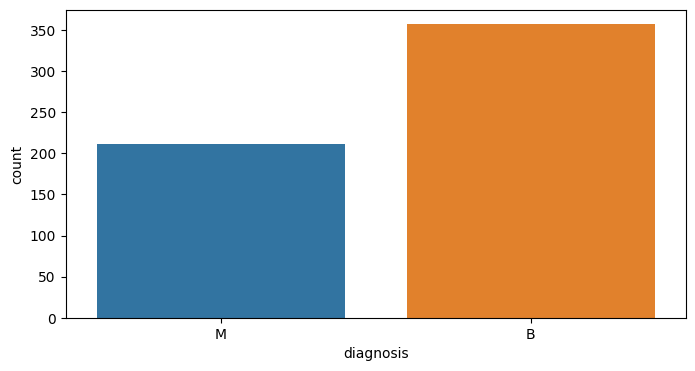

In [3]:
plt.figure(figsize=(8,4))
alvo = 'diagnosis'
sns.countplot(data = df, x = alvo)

benigno, maligno = df[alvo].value_counts()
benigno_pct = (benigno/df.shape[0])*100
maligno_pct = (maligno/df.shape[0])*100

print(f"Casos de tumor benigno: {benigno} ({benigno_pct:.2f}%)")
print(f"Casos de tumor maligno: {maligno} ({maligno_pct:.2f}%)")

## Um primeiro olhar sobre as correlações

-  A fim de obter uma interpretabilidade simples e intuitiva,
 vamos considerar somente as variáveis explanatórias médias ("mean")
 em uma primeira abordagem.
- Mais adiante, levaremos em conta mais variáveis explanatórias
("features") e analisaremos o impacto sobre nosso modelo.

In [11]:
cols_mean = [
        alvo,
        "radius_mean",
        "texture_mean",
        "perimeter_mean",
        "area_mean",
        "smoothness_mean",
        "compactness_mean",
        "concavity_mean",
        "concave points_mean",
        "symmetry_mean",
        "fractal_dimension_mean"
       ]
df_mean = df[cols_mean].copy()

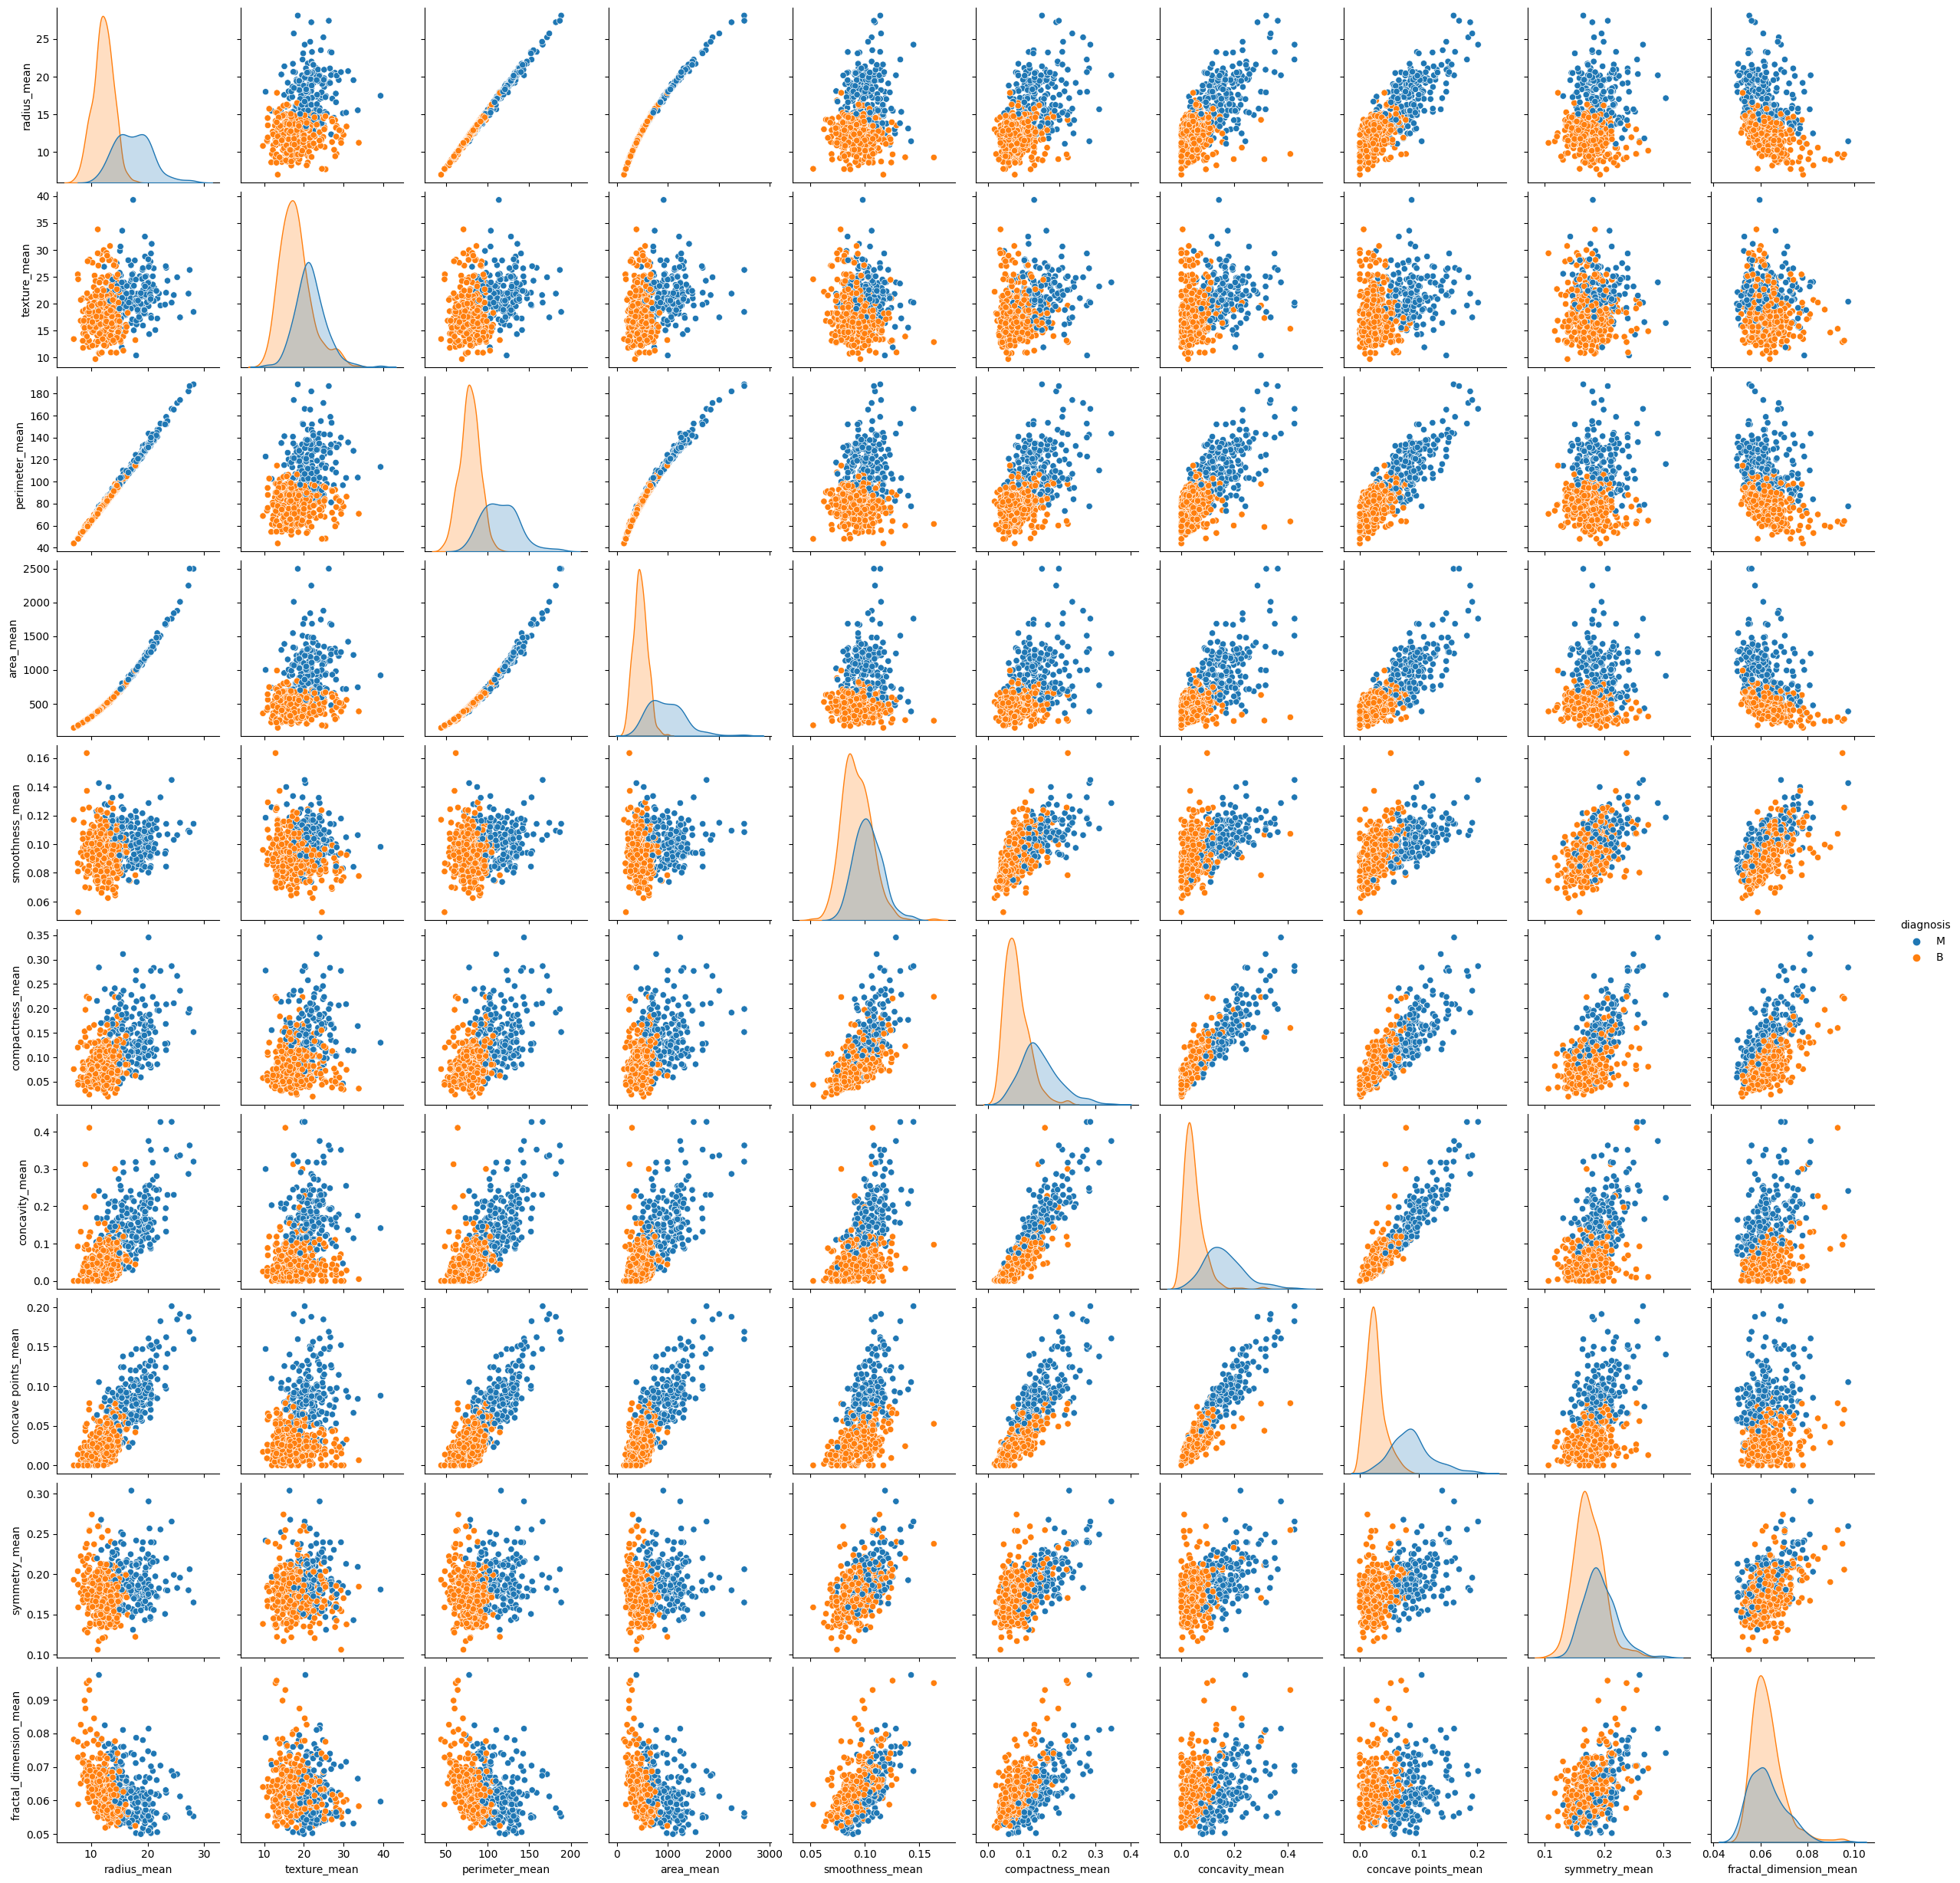

In [ ]:
sns.pairplot(data = df_mean, hue = alvo)

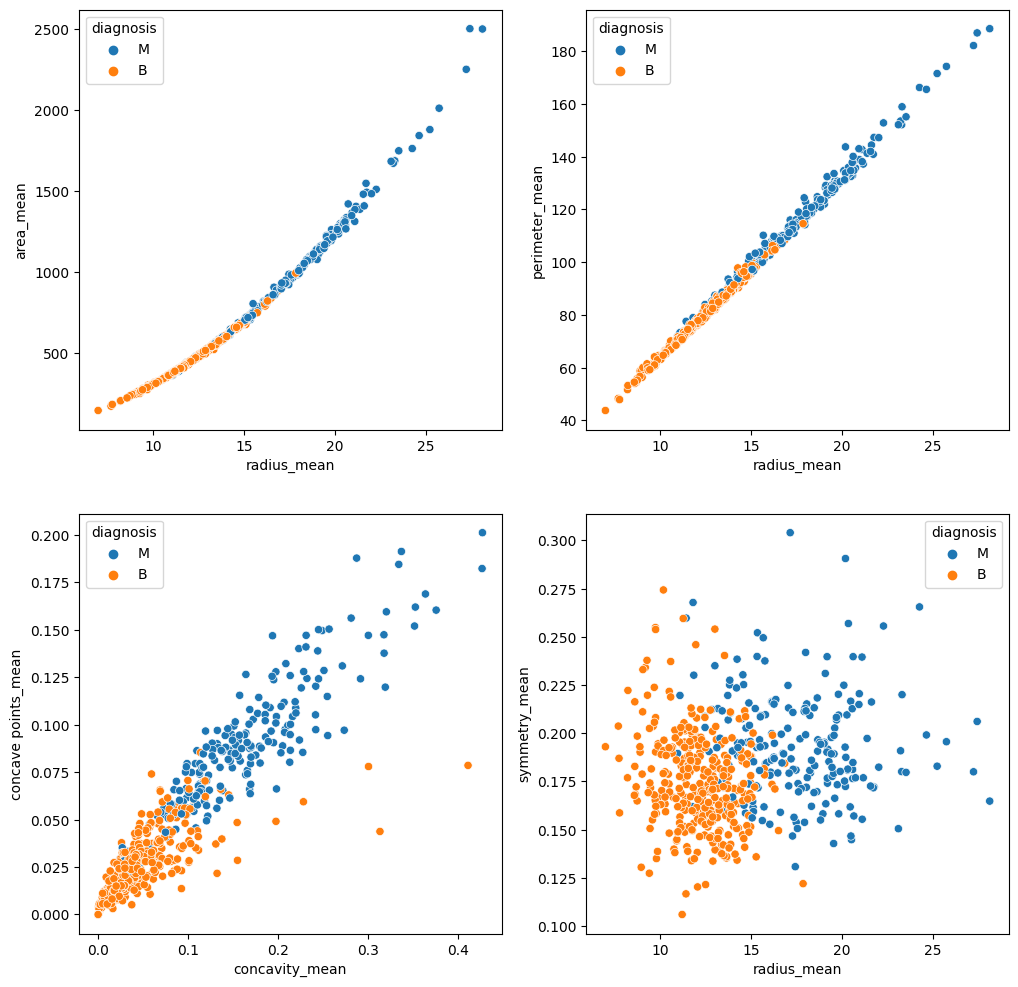

In [ ]:
fig = plt.figure(figsize=(12,12))
plt.subplot(221)
sns.scatterplot(data=df_mean, x="radius_mean", y="area_mean", hue=alvo)
plt.subplot(222)
sns.scatterplot(data=df_mean, x="radius_mean", y="perimeter_mean", hue=alvo)
plt.subplot(223)
sns.scatterplot(data=df_mean, x="concavity_mean", y="concave points_mean", hue=alvo)
plt.subplot(224)
sns.scatterplot(data=df_mean, x="radius_mean", y="symmetry_mean", hue=alvo)

plt.show()

<font color=red>
    
- Descrever comportamento dos gráficos acima e extrair primeiros insights.
- Acrescentar mais insights.

## Analisando correlações com a variável alvo

In [12]:
# Trocando os rótulos de classe 'B' (benigno) e 'M' (maligno) por valores numéricos  
df_mean[alvo]=(df_mean[alvo] =='M').astype(int)
#df_mean[alvo].replace(to_replace = dict(B = 0, M = 1), inplace = True)
df_mean.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                          
842302            1        17.99         10.38          122.80     1001.0   
842517            1        20.57         17.77          132.90     1326.0   
84300903          1        19.69         21.25          130.00     1203.0   
84348301          1        11.42         20.38           77.58      386.1   
84358402          1        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  fractal_dimension_mean  
id                                                                    
842302                0.14710         0.2419                 0.07871  
842517                0.07017         0.1812                 0.05667  
84300903              0.12790         0.2069                 0.05999  
84348301              0.10520         0.2597                 0.09744  
84358402              0.10430         0.1809                 0.05883

In [ ]:
correlacoes_alvo = df_mean.corr()
correlacoes_alvo[alvo].sort_values(ascending=False)

diagnosis                 1.000000
concave points_mean       0.776614
perimeter_mean            0.742636
radius_mean               0.730029
area_mean                 0.708984
concavity_mean            0.696360
compactness_mean          0.596534
texture_mean              0.415185
smoothness_mean           0.358560
symmetry_mean             0.330499
fractal_dimension_mean   -0.012838
Name: diagnosis, dtype: float64

## Analisando correlações entre as variáveis explanatórias

In [13]:
# Analyzing correlations among explanatory variables
df_mean_explan = df_mean.copy()
df_mean_explan = df_mean_explan.drop([alvo], axis = 'columns')

df_mean_explan.head()

radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                               
842302          17.99         10.38          122.80     1001.0   
842517          20.57         17.77          132.90     1326.0   
84300903        19.69         21.25          130.00     1203.0   
84348301        11.42         20.38           77.58      386.1   
84358402        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  fractal_dimension_mean  
id                                                                    
842302                0.14710         0.2419                 0.07871  
842517                0.07017         0.1812                 0.05667  
84300903              0.12790         0.2069                 0.05999  
84348301              0.10520         0.2597                 0.09744  
84358402              0.10430         0.1809                 0.05883

In [14]:

correlacoes_explan = df_mean_explan.corr()
correlacoes_explan

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                1.000000      0.323782        0.997855   0.987357   
texture_mean               0.323782      1.000000        0.329533   0.321086   
perimeter_mean             0.997855      0.329533        1.000000   0.986507   
area_mean                  0.987357      0.321086        0.986507   1.000000   
smoothness_mean            0.170581     -0.023389        0.207278   0.177028   
compactness_mean           0.506124      0.236702        0.556936   0.498502   
concavity_mean             0.676764      0.302418        0.716136   0.685983   
concave points_mean        0.822529      0.293464        0.850977   0.823269   
symmetry_mean              0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean    -0.311631     -0.076437       -0.261477  -0.283110   

                        smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                    0.170581          0.506124        0.676764   
texture_mean                  -0.023389          0.236702        0.302418   
perimeter_mean                 0.207278          0.556936        0.716136   
area_mean                      0.177028          0.498502        0.685983   
smoothness_mean                1.000000          0.659123        0.521984   
compactness_mean               0.659123          1.000000        0.883121   
concavity_mean                 0.521984          0.883121        1.000000   
concave points_mean            0.553695          0.831135        0.921391   
symmetry_mean                  0.557775          0.602641        0.500667   
fractal_dimension_mean         0.584792          0.565369        0.336783   

                        concave points_mean  symmetry_mean  \
radius_mean                        0.822529       0.147741   
texture_mean                       0.293464       0.071401   
perimeter_mean                     0.850977       0.183027   
area_mean                          0.823269       0.151293   
smoothness_mean                    0.553695       0.557775   
compactness_mean                   0.831135       0.602641   
concavity_mean                     0.921391       0.500667   
concave points_mean                1.000000       0.462497   
symmetry_mean                      0.462497       1.000000   
fractal_dimension_mean             0.166917       0.479921   

                        fractal_dimension_mean  
radius_mean                          -0.311631  
texture_mean                         -0.076437  
perimeter_mean                       -0.261477  
area_mean                            -0.283110  
smoothness_mean                       0.584792  
compactness_mean                      0.565369  
concavity_mean                        0.336783  
concave points_mean                   0.166917  
symmetry_mean                         0.479921  
fractal_dimension_mean                1.000000

<Axes: >

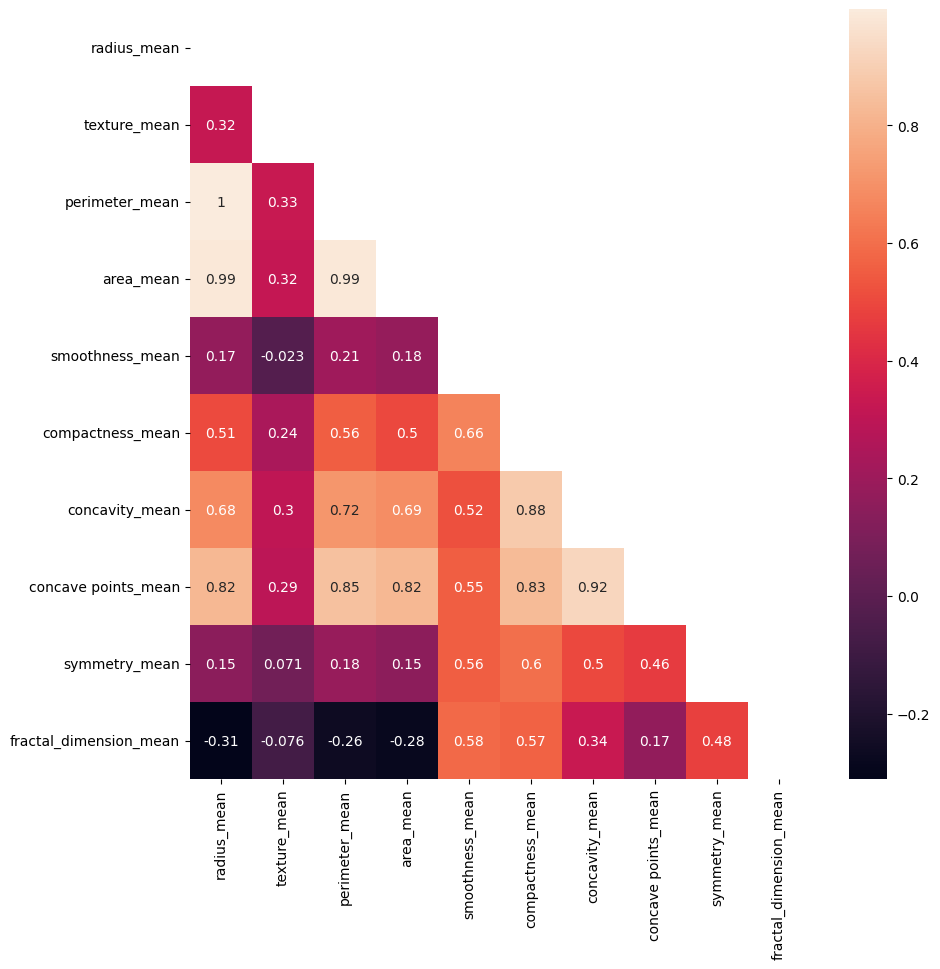

In [ ]:
# Máscara para o triângulo superior
masc_triang_sup = np.zeros_like(correlacoes_explan, dtype=bool)
masc_triang_sup[np.triu_indices_from(masc_triang_sup)] = True

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data = correlacoes_explan, annot=True, mask=masc_triang_sup)

<font color = red>

- <b>Escrever uma justificativa para escolhermos as variáveis abaixo (argumentar sobre as correções)</b>
Uma análise sobre a matriz de correlação nos indica que as variáveis perímetro e área (perimeter_mean & area_mean) podem ser explicadas pelo raio da célula. Similarmente, a concavidade podem ser explicada pelos pontos de concavidade. Quais tirar? A relaçao entre a concavidade e seus pontos tende a ser linear, usarei o critério que os pontos tem mais correlação com o resultado diagnosis que a concavidade, mesmo se tratando de uma regressão logística. Similarmente, o eleito para ficar será o perímetro.
Outra análise tem de ver com o indicador fractálico, que tem correlação quase nula com a diagnosis, e vamos ver se pode ser retirado do conjunto de *features*

In [17]:
chosen_features = [
                    'perimeter_mean',
                    'texture_mean',
                    'smoothness_mean',
                    'concave points_mean',
                    'compactness_mean',
                    'symmetry_mean',
                    'fractal_dimension_mean'
]

In [43]:
df_prep = df_mean[[alvo] + chosen_features].copy()
#df_prep['diagnosis'] = df_mean['diagnosis']
df_prep.head()
print('Para fractal_dimension_mean:')
print('Média Y=1: ',(df_prep[df_prep[alvo]==1]['fractal_dimension_mean']).mean())
print('Média Y=0: ',(df_prep[df_prep[alvo]==0]['fractal_dimension_mean']).mean())
print('')
print('Mediana Y=1: ',(df_prep[df_prep[alvo]==1]['fractal_dimension_mean']).median())
print('Mediana Y=0: ',(df_prep[df_prep[alvo]==0]['fractal_dimension_mean']).median())
print('')
print('Desvio P Y=1: ',(df_prep[df_prep[alvo]==1]['fractal_dimension_mean']).std())
print('Desvio P Y=0: ',(df_prep[df_prep[alvo]==0]['fractal_dimension_mean']).std())

Para fractal_dimension_mean:
Média Y=1:  0.06268009433962264
Média Y=0:  0.0628673949579832

Mediana Y=1:  0.061575000000000005
Mediana Y=0:  0.06154

Desvio P Y=1:  0.007573315024808589
Desvio P Y=0:  0.0067473428139250636


as médias e medianas de **fractal_dimension_mean** para os casos de diagnosis=0 e diagnosis=0 praticamente não mudam, o qual permeteria inferir que fractal_dimension_mean não incide na resposta, motivo pelo qual vai ser excluido do _dataframe_

In [98]:
chosen_features.remove('fractal_dimension_mean')
df_prep.drop(columns=['fractal_dimension_mean'], inplace=True)
correlacoes_prep = df_prep.corr()

KeyError: ignored

<Axes: >

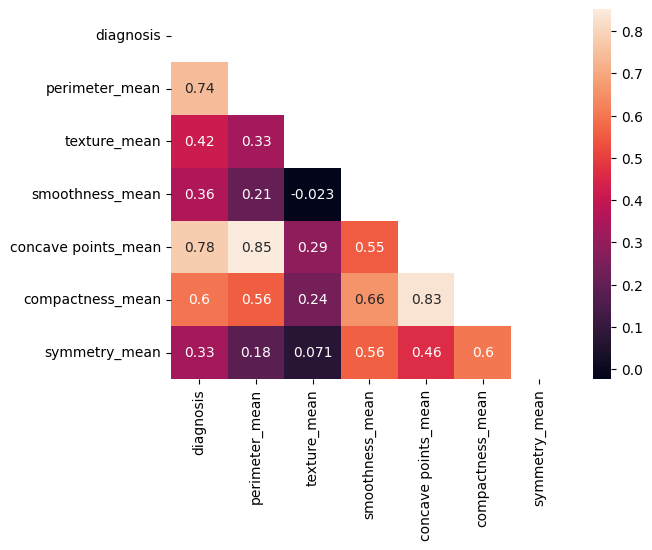

In [45]:
#correlations_explanatory = df_mean_explanatory.corr()
masc_triang_sup_prep = np.zeros_like(correlacoes_prep, dtype=bool)
masc_triang_sup_prep[np.triu_indices_from(masc_triang_sup_prep)] = True

sns.heatmap(correlacoes_prep, annot = True, mask=masc_triang_sup_prep)

# **Modelagem**

## Primeira abordagem

### Construção do modelo 

#### Separação dos dados

In [52]:
# Selecionando as colunas com variáveis explanatórias (features)
cols = df_prep.drop(columns=alvo).columns

# Separando os dados em grupos de treino e de teste 
X = df_prep[cols]
y = df_prep[alvo]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Treinamento

In [78]:
# Rearranjando X antes de fazer o fitting
X_train_array = np.array(X_train).reshape(-1, X.shape[1]) 
logistic_reg = LogisticRegression()
model = logistic_reg.fit(X_train_array, y_train)
print(model.score(X_train_array, y_train))

0.8844221105527639

#### Teste

In [94]:
# Rearranjando X_test
X_test_array = np.array(X_test).reshape(-1,X.shape[1])
#y_test_array = np.array(y_test).reshape(-1,y.shape[1])
# Fazendo previsões para classificação das 2 classes (0 e 1) usando os dados para teste
y_pred = model.predict(X_test_array)
print('MSE test: ',mean_squared_error(y_test, y_pred))

y_pred_train = model.predict(X_train_array)
print('MSE train: ',mean_squared_error(y_train, y_pred_train))
# R-Squared
#
print('R^2 train: %.3f, R^2 test: %.3f' % (r2_score(y_train, y_pred_train),
                r2_score(y_test,y_pred)))

MSE test:  0.07602339181286549
MSE train:  0.11557788944723618
R^2 train: 0.507, R^2 test: 0.673


### Avaliação do modelo (métricas)

#### Matriz de confusão

Matriz de Confusão: 
 



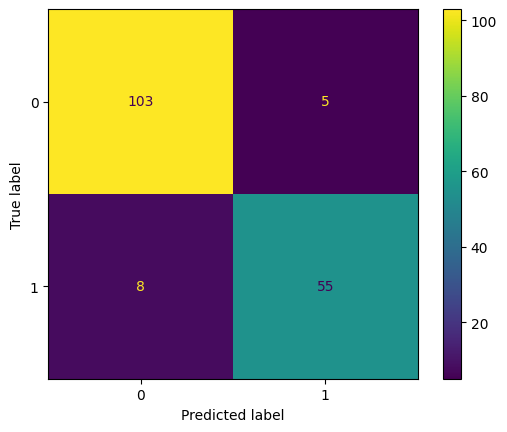

              precision    recall  f1-score   support

           0      0.928     0.954     0.941       108
           1      0.917     0.873     0.894        63

    accuracy                          0.924       171
   macro avg      0.922     0.913     0.917       171
weighted avg      0.924     0.924     0.924       171

Verdadeiro negativo: 103
Falso positivo: 5
Falso negativo: 8
Verdadeiro positivo: 55
--------------------------------
Acurácia: 0.924
Precisão: 0.917
Recall: 0.873


In [55]:
matriz_conf = confusion_matrix(y_test, y_pred)

verdadeiro_negativo = matriz_conf[0][0]
falso_positivo = matriz_conf[0][1]
falso_negativo = matriz_conf[1][0]
verdadeiro_positivo = matriz_conf[1][1]

print('Matriz de Confusão: \n', '\n')
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_conf)
disp.plot()
plt.show()
print(classification_report(y_test, y_pred, digits=3))
print('Verdadeiro negativo:', verdadeiro_negativo)
print('Falso positivo:', falso_positivo)
print('Falso negativo:', falso_negativo)
print('Verdadeiro positivo:', verdadeiro_positivo)

print('-'*32)

print("Acurácia:", round(accuracy_score(y_test, model.predict(X_test_array)), 3))
print("Precisão:", round(precision_score(y_test, model.predict(X_test_array)),3))
print("Recall:", round(recall_score(y_test, model.predict(X_test_array)),3))

#### Curva ROC

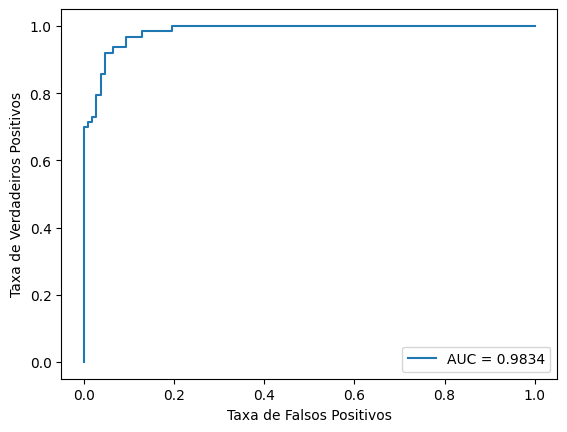

In [56]:
#A matriz de probabilidades onde cada linha tem as probabilidades
#do valor estimado a partir do X_test_array ser 0 e ser 1
y_pred_prob = logistic_reg.predict_proba(X_test_array)

# Para fazer a área por baixo da curva, os parámetros da função  são
# os y de teste e as probabilidades de a regressao aplicada
# ao X_test retorne 1

probab_y_pred_ser_1 = y_pred_prob[:,1]

taxa_falsos_positivos, taxa_verdadeiros_positivos, _ = roc_curve(y_test,  probab_y_pred_ser_1)

auc = roc_auc_score(y_test, probab_y_pred_ser_1)


plt.plot(taxa_falsos_positivos,taxa_verdadeiros_positivos, label = "AUC = " + str(round(auc,4)))
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlabel('Taxa de Falsos Positivos')
plt.legend(loc=4)
plt.show()

## Refinando o modelo - Parte 1

Acrescentando variáveis explanatórias com erro padrão ("SE - standard error")

### Construção 

<font color = red>

- Acrescentar as colunas com erro padrão
```
colunas_novas = [
                    'radius_se',
                    'texture_se',
                    'smoothness_se',
                    'compactness_se',
                    'symmetry_se',
                    'fractal_dimension_se'
]
```
    
- Executar os outros passos da construção e avaliação do modelo

In [99]:
colunas_novas = [
                  'radius_se',
                  'texture_se',
                  'perimeter_se',
                  'area_se',
                  'smoothness_se',
                  'compactness_se',
                  'concavity_se',
                  'concave points_se',
                  'symmetry_se',
                  'fractal_dimension_se'
]

df_se = df[[alvo] + chosen_features + colunas_novas].copy()
df_se[alvo]=(df_se[alvo] =='M').astype(int)

df_se.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diagnosis             569 non-null    int64  
 1   perimeter_mean        569 non-null    float64
 2   texture_mean          569 non-null    float64
 3   smoothness_mean       569 non-null    float64
 4   concave points_mean   569 non-null    float64
 5   compactness_mean      569 non-null    float64
 6   symmetry_mean         569 non-null    float64
 7   radius_se             569 non-null    float64
 8   texture_se            569 non-null    float64
 9   perimeter_se          569 non-null    float64
 10  area_se               569 non-null    float64
 11  smoothness_se         569 non-null    float64
 12  compactness_se        569 non-null    float64
 13  concavity_se          569 non-null    float64
 14  concave points_se     569 non-null    float64
 15  symmetry_se     

#### Separação dos dados

In [100]:
# Selecionando as colunas com variáveis explanatórias (features)
cols_se = df_se.drop(columns=alvo).columns

# Separando os dados em grupos de treino e de teste 
X_se = df_se[cols_se]
y_se = df_se[alvo]

X_train_se, X_test_se, y_train_se, y_test_se = train_test_split(X_se, y_se, test_size=0.3, random_state=42)

#### Treinamento

In [101]:
# Rearranjando X antes de fazer o fitting
X_train_array_se = np.array(X_train_se).reshape(-1, X_se.shape[1]) 
logistic_reg_se = LogisticRegression()
model_se = logistic_reg_se.fit(X_train_array_se, y_train_se)

#### Teste

In [102]:
# Rearranjando X_test
X_test_array_se = np.array(X_test_se).reshape(-1,X_se.shape[1])

# Fazendo previsões para classificação das 2 classes (0 e 1) usando os dados para teste
y_pred_se = model_se.predict(X_test_array_se) 

### Avaliação (métricas)

#### Matriz de confusão

Matriz de Confusão: 
 



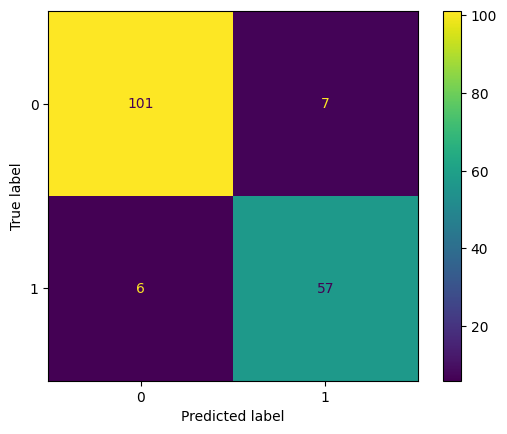

              precision    recall  f1-score   support

           0      0.944     0.935     0.940       108
           1      0.891     0.905     0.898        63

    accuracy                          0.924       171
   macro avg      0.917     0.920     0.919       171
weighted avg      0.924     0.924     0.924       171

Verdadeiro negativo: 101
Falso positivo: 7
Falso negativo: 6
Verdadeiro positivo: 57
--------------------------------
Acurácia: 0.924
Precisão: 0.891
Recall: 0.905


In [103]:
matriz_conf_se = confusion_matrix(y_test_se, y_pred_se)

verdadeiro_negativo_se = matriz_conf_se[0][0]
falso_positivo_se = matriz_conf_se[0][1]
falso_negativo_se = matriz_conf_se[1][0]
verdadeiro_positivo_se = matriz_conf_se[1][1]

print('Matriz de Confusão: \n', '\n')
disp_se = ConfusionMatrixDisplay(confusion_matrix=matriz_conf_se)
disp_se.plot()
plt.show()
print(classification_report(y_test_se, y_pred_se, digits=3))
print('Verdadeiro negativo:', verdadeiro_negativo_se)
print('Falso positivo:', falso_positivo_se)
print('Falso negativo:', falso_negativo_se)
print('Verdadeiro positivo:', verdadeiro_positivo_se)

print('-'*32)

print("Acurácia:", round(accuracy_score(y_test_se, model_se.predict(X_test_array_se)), 3))
print("Precisão:", round(precision_score(y_test_se, model_se.predict(X_test_array_se)),3))
print("Recall:", round(recall_score(y_test_se, model_se.predict(X_test_array_se)),3))

#### Curva ROC

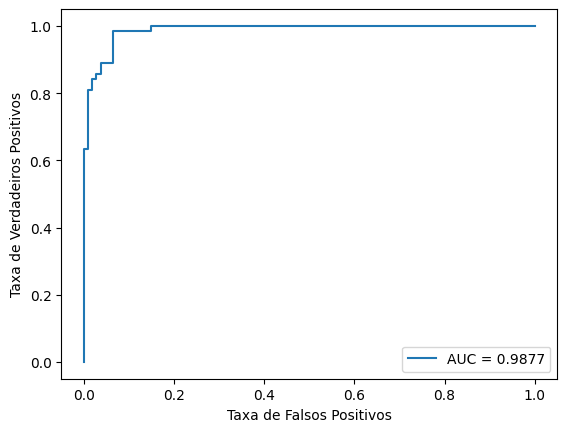

In [104]:
#A matriz de probabilidades onde cada linha tem as probabilidades
#do valor estimado a partir do X_test_array ser 0 e ser 1
y_pred_prob_se = logistic_reg_se.predict_proba(X_test_array_se)

# Para fazer a área por baixo da curva, os parámetros da função  são
# os y de teste e as probabilidades de a regressao aplicada
# ao X_test retorne 1

probab_y_pred_ser_1_se = y_pred_prob_se[:,1]

taxa_falsos_positivos_se, taxa_verdadeiros_positivos_se, _ = roc_curve(y_test_se,  probab_y_pred_ser_1_se)

auc_se = roc_auc_score(y_test_se, probab_y_pred_ser_1_se)


plt.plot(taxa_falsos_positivos_se,taxa_verdadeiros_positivos_se, label = "AUC = " + str(round(auc_se,4)))
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlabel('Taxa de Falsos Positivos')
plt.legend(loc=4)
plt.show()

## Refinando o modelo - Parte 2

Acrescentando variáveis explanatórias com média dos piores ("worst")

In [105]:
colunas_worst = [
                  'radius_worst',
                  'texture_worst',
                  'perimeter_worst',
                  'area_worst',
                  'smoothness_worst',
                  'compactness_worst',
                  'concavity_worst',
                  'concave points_worst',
                  'symmetry_worst',
                  'fractal_dimension_worst'
]

df_worst = df[[alvo] + chosen_features + colunas_novas + colunas_worst].copy()
df_worst[alvo]=(df_worst[alvo] =='M').astype(int)

df_worst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   perimeter_mean           569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   smoothness_mean          569 non-null    float64
 4   concave points_mean      569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   symmetry_mean            569 non-null    float64
 7   radius_se                569 non-null    float64
 8   texture_se               569 non-null    float64
 9   perimeter_se             569 non-null    float64
 10  area_se                  569 non-null    float64
 11  smoothness_se            569 non-null    float64
 12  compactness_se           569 non-null    float64
 13  concavity_se             569 non-null    float64
 14  concave points_se  

### Construção 

#### Separação dos dados

In [106]:
# Selecionando as colunas com variáveis explanatórias (features)
cols_worst = df_worst.drop(columns=alvo).columns

# Separando os dados em grupos de treino e de teste 
X_worst = df_worst[cols_worst]
y_worst = df_worst[alvo]

X_train_worst, X_test_worst, y_train_worst, y_test_worst = train_test_split(X_worst, y_worst, test_size=0.3, random_state=42)

#### Treinamento

In [108]:
# Rearranjando X antes de fazer o fitting
X_train_array_worst = np.array(X_train_worst).reshape(-1, X_worst.shape[1]) 
logistic_reg_worst = LogisticRegression()
model_worst = logistic_reg_worst.fit(X_train_array_worst, y_train_worst)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Teste

In [109]:
# Rearranjando X_test
X_test_array_worst = np.array(X_test_worst).reshape(-1,X_worst.shape[1])

# Fazendo previsões para classificação das 2 classes (0 e 1) usando os dados para teste
y_pred_worst = model_worst.predict(X_test_array_worst) 

### Avaliação (métricas)

#### Matriz de confusão

Matriz de Confusão: 
 



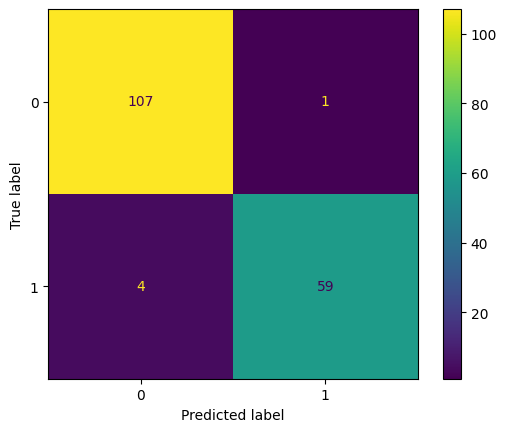

              precision    recall  f1-score   support

           0      0.964     0.991     0.977       108
           1      0.983     0.937     0.959        63

    accuracy                          0.971       171
   macro avg      0.974     0.964     0.968       171
weighted avg      0.971     0.971     0.971       171

Verdadeiro negativo: 107
Falso positivo: 1
Falso negativo: 4
Verdadeiro positivo: 59
--------------------------------
Acurácia: 0.971
Precisão: 0.983
Recall: 0.937


In [110]:
matriz_conf_worst = confusion_matrix(y_test_worst, y_pred_worst)

verdadeiro_negativo_worst = matriz_conf_worst[0][0]
falso_positivo_worst = matriz_conf_worst[0][1]
falso_negativo_worst = matriz_conf_worst[1][0]
verdadeiro_positivo_worst = matriz_conf_worst[1][1]

print('Matriz de Confusão: \n', '\n')
disp_worst = ConfusionMatrixDisplay(confusion_matrix=matriz_conf_worst)
disp_worst.plot()
plt.show()
print(classification_report(y_test_worst, y_pred_worst, digits=3))
print('Verdadeiro negativo:', verdadeiro_negativo_worst)
print('Falso positivo:', falso_positivo_worst)
print('Falso negativo:', falso_negativo_worst)
print('Verdadeiro positivo:', verdadeiro_positivo_worst)

print('-'*32)

print("Acurácia:", round(accuracy_score(y_test_worst, model_worst.predict(X_test_array_worst)), 3))
print("Precisão:", round(precision_score(y_test_worst, model_worst.predict(X_test_array_worst)),3))
print("Recall:", round(recall_score(y_test_worst, model_worst.predict(X_test_array_worst)),3))

#### Curva ROC

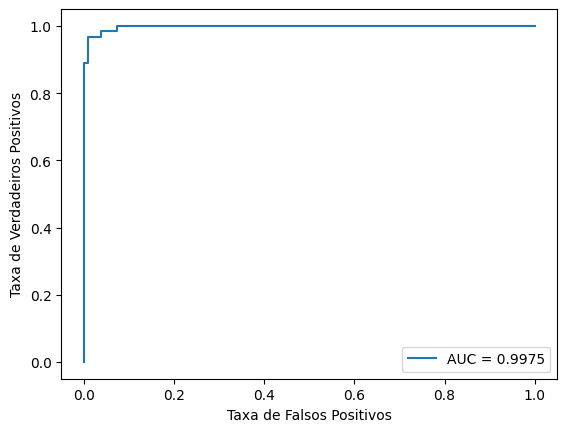

In [111]:
#A matriz de probabilidades onde cada linha tem as probabilidades
#do valor estimado a partir do X_test_array ser 0 e ser 1
y_pred_prob_worst = logistic_reg_worst.predict_proba(X_test_array_worst)

# Para fazer a área por baixo da curva, os parámetros da função  são
# os y de teste e as probabilidades de a regressao aplicada
# ao X_test retorne 1

probab_y_pred_ser_1_worst = y_pred_prob_worst[:,1]

taxa_falsos_positivos_worst, taxa_verdadeiros_positivos_worst, _ = roc_curve(y_test_worst,  probab_y_pred_ser_1_worst)

auc_worst = roc_auc_score(y_test_worst, probab_y_pred_ser_1_worst)


plt.plot(taxa_falsos_positivos_worst,taxa_verdadeiros_positivos_worst, label = "AUC = " + str(round(auc_worst,4)))
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlabel('Taxa de Falsos Positivos')
plt.legend(loc=4)
plt.show()

# **Conclusões**

<font color = red>

- Escrever conclusões

In [112]:
data = {
    'modelo': ['mean', 'se', 'worst'],
    'Acurácia': [round(accuracy_score(y_test,       model.predict(X_test_array            )), 3),
                 round(accuracy_score(y_test_se,    model_se.predict(X_test_array_se      )), 3),
                 round(accuracy_score(y_test_worst, model_worst.predict(X_test_array_worst)), 3)],
    'Precisão': [round(precision_score(y_test,       model.predict(X_test_array            )), 3),
                 round(precision_score(y_test_se,    model_se.predict(X_test_array_se      )), 3),
                 round(precision_score(y_test_worst, model_worst.predict(X_test_array_worst)), 3)],
    'Recall'  : [round(recall_score(y_test,       model.predict(X_test_array            )), 3),
                 round(recall_score(y_test_se,    model_se.predict(X_test_array_se      )), 3),
                 round(recall_score(y_test_worst, model_worst.predict(X_test_array_worst)), 3)],
    'ROC_AUC' : [auc, auc_se, auc_worst]
}
results = pd.DataFrame(data)
results

modelo  Acurácia  Precisão  Recall   ROC_AUC
0   mean     0.924     0.917   0.873  0.983392
1     se     0.924     0.891   0.905  0.987654
2  worst     0.971     0.983   0.937  0.997501

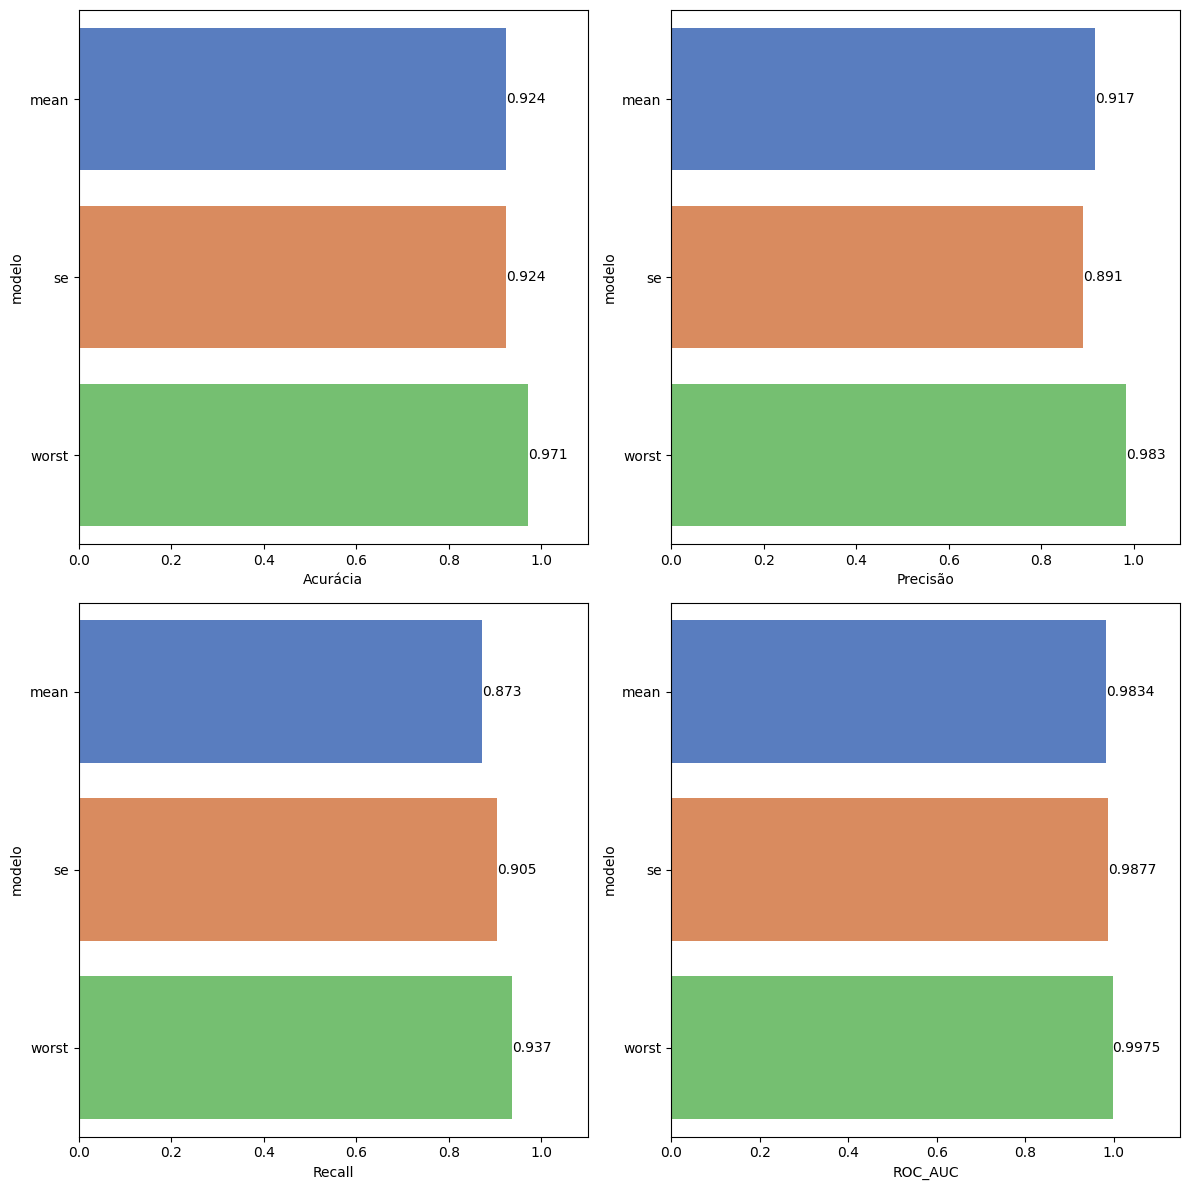

In [113]:
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
sns.barplot(data=results, x='Acurácia', y='modelo', palette='muted')
for i in range(len(results)):
    plt.annotate(f"{results['Acurácia'][i]}", xy=(results['Acurácia'][i], i), ha='left', va='center')
plt.xlim(0, 1.1)

plt.subplot(222)
sns.barplot(data=results, x='Precisão', y='modelo', palette='muted')
for i in range(len(results)):
    plt.annotate(f"{results['Precisão'][i]}", xy=(results['Precisão'][i], i), ha='left', va='center')
plt.xlim(0, 1.1)

plt.subplot(223)
sns.barplot(data=results, x='Recall', y='modelo', palette='muted')
for i in range(len(results)):
    plt.annotate(f"{results['Recall'][i]}", xy=(results['Recall'][i], i), ha='left', va='center')
plt.xlim(0, 1.1)

plt.subplot(224)
sns.barplot(data=results, x='ROC_AUC', y='modelo', palette='muted')
for i in range(len(results)):
    plt.annotate(f"{results['ROC_AUC'][i]:.4f}", xy=(results['ROC_AUC'][i], i), ha='left', va='center')
plt.xlim(0, 1.15)

plt.tight_layout()
plt.show()

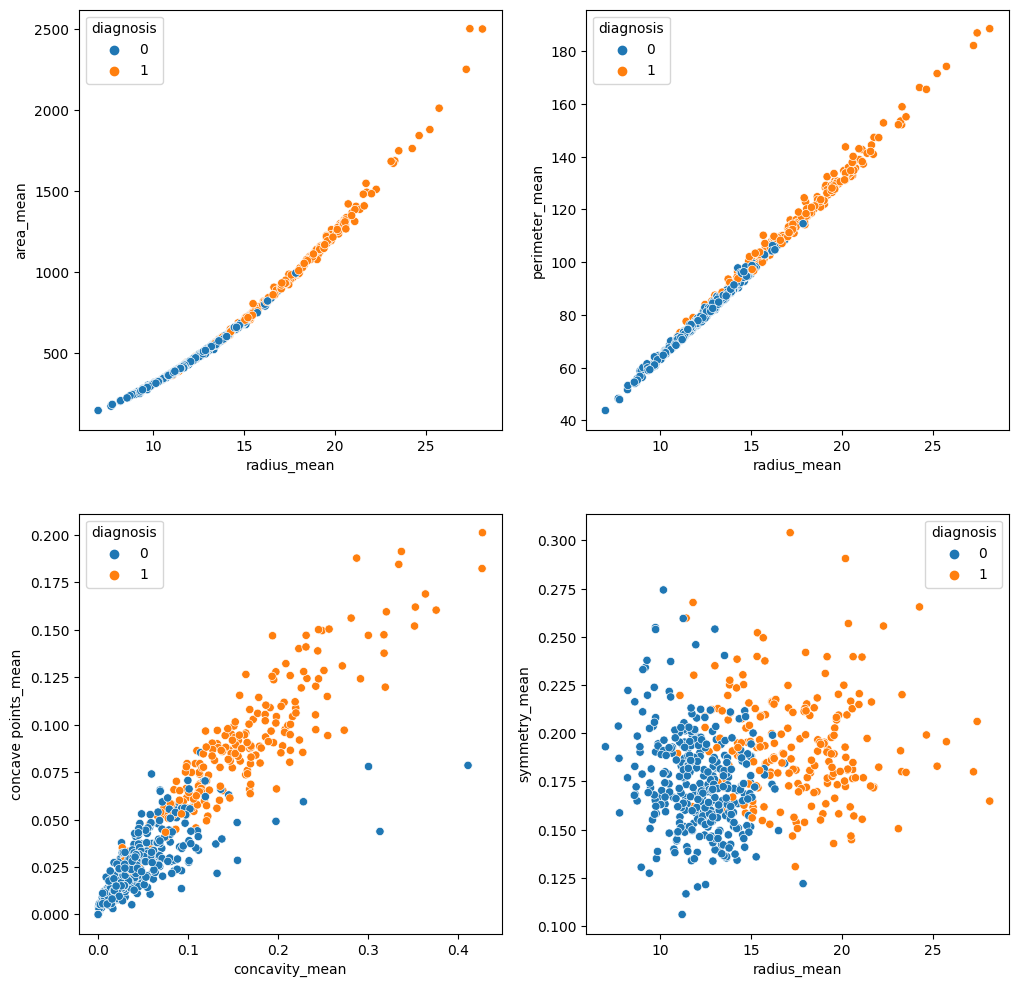

In [114]:
fig = plt.figure(figsize=(12,12))
plt.subplot(221)
sns.scatterplot(data=df_mean, x="radius_mean", y="area_mean", hue=alvo)
plt.subplot(222)
sns.scatterplot(data=df_mean, x="radius_mean", y="perimeter_mean", hue=alvo)
plt.subplot(223)
sns.scatterplot(data=df_mean, x="concavity_mean", y="concave points_mean", hue=alvo)
plt.subplot(224)
sns.scatterplot(data=df_mean, x="radius_mean", y="symmetry_mean", hue=alvo)

plt.show()